In [1]:
train = read.csv(file = 
                  file.path("C:/Users/Vance He/Desktop/UMich/2020_WN/STATS503/hw/hw4/bank_marketing_train.csv"))
test = read.csv(file = 
                  file.path("C:/Users/Vance He/Desktop/UMich/2020_WN/STATS503/hw/hw4/bank_marketing_test.csv"))

**a)** The data set has been divided at random into training and testing
parts that contain 70% and 30% of the clients respectively.
Fit a classification tree using only the training set. Find the percentage
of clients in the test set that were misclassified by your optimal tree. Of all the ‘no’ clients of the test set what percentage
was misclassified and of all the ‘yes’ clients of the test set
what percentage was misclassified?

In [2]:
dim(train)

[1] 7813   17

In [3]:
dim(test)

[1] 3349   17

In [2]:
head(train)

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
27,blue-collar,married,secondary,no,61,yes,no,unknown,19,jun,1012,1,-1,0,unknown,yes
50,blue-collar,divorced,secondary,no,204,yes,yes,unknown,14,may,421,1,-1,0,unknown,no
34,management,single,tertiary,no,171,yes,no,cellular,7,may,191,1,294,1,failure,no
27,student,single,tertiary,no,118,no,no,cellular,31,aug,160,3,98,1,failure,yes
36,management,single,unknown,no,62,no,no,cellular,13,jul,311,1,91,2,success,yes
38,blue-collar,single,primary,no,0,yes,no,cellular,7,may,350,2,-1,0,unknown,no


In [3]:
head(test)

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
30,blue-collar,married,secondary,no,309,yes,no,unknown,7,may,1574,2,-1,0,unknown,yes
32,blue-collar,single,primary,no,611,yes,no,unknown,8,may,541,3,-1,0,unknown,yes


In [3]:
# convert class label column to factor variable
train$deposit = factor(train$deposit)
levels(train$deposit) = c("No", "Yes")

test$deposit = factor(test$deposit)
levels(test$deposit) = c("No", "Yes")

In [6]:
head(train)

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
27,blue-collar,married,secondary,no,61,yes,no,unknown,19,jun,1012,1,-1,0,unknown,Yes
50,blue-collar,divorced,secondary,no,204,yes,yes,unknown,14,may,421,1,-1,0,unknown,No
34,management,single,tertiary,no,171,yes,no,cellular,7,may,191,1,294,1,failure,No
27,student,single,tertiary,no,118,no,no,cellular,31,aug,160,3,98,1,failure,Yes
36,management,single,unknown,no,62,no,no,cellular,13,jul,311,1,91,2,success,Yes
38,blue-collar,single,primary,no,0,yes,no,cellular,7,may,350,2,-1,0,unknown,No


In [7]:
head(test)

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,Yes
54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,Yes
42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,Yes
56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,Yes
30,blue-collar,married,secondary,no,309,yes,no,unknown,7,may,1574,2,-1,0,unknown,Yes
32,blue-collar,single,primary,no,611,yes,no,unknown,8,may,541,3,-1,0,unknown,Yes


Create Tree

In [4]:
table(train$deposit)


  No  Yes 
4128 3685 

In [5]:
library(rpart)
library(rpart.plot)

Warning message:
"package 'rpart.plot' was built under R version 3.6.3"

<font color="red"> create tree, do we need to check the best CP</font>

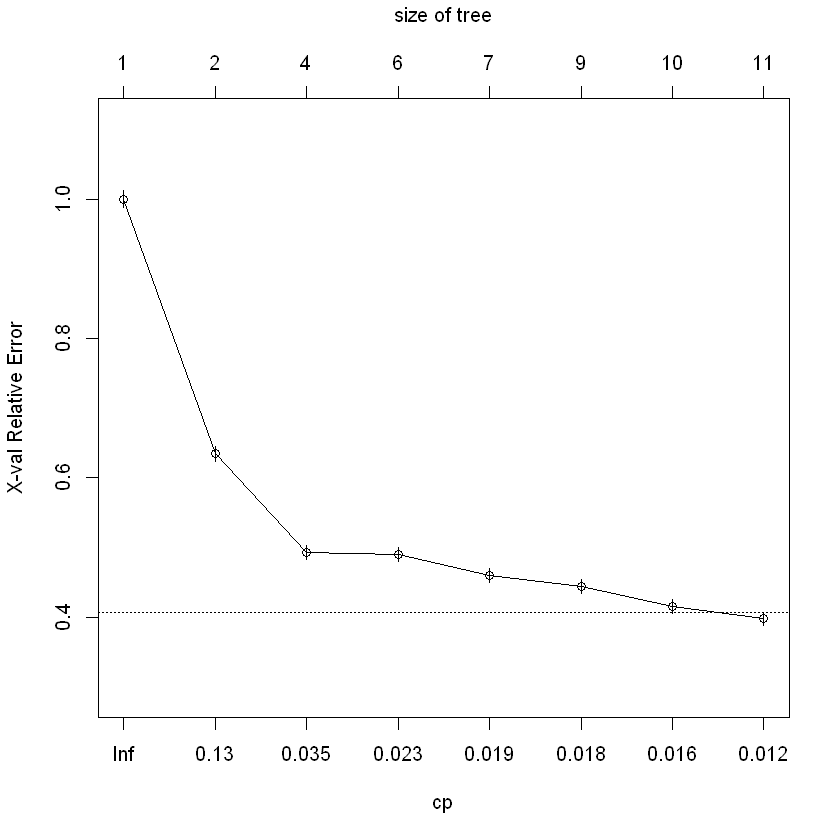

In [6]:
tree1.gini = rpart(deposit ~ ., data = train, parms = list(split = "gini"), method = "class")
plotcp(tree1.gini)

In [7]:
tree = rpart(deposit ~ ., data = train, parms = list(split = "gini"), method = "class"， cp = 0.016)

In [8]:
# training error
train_pred = predict(tree, train, type = "class")
table(train_pred, train$deposit)

          
train_pred   No  Yes
       No  3036  386
       Yes 1092 3299

In [9]:
train_err = mean(train_pred != train$deposit)
train_err

[1] 0.1891719

In [10]:
dim(test)

[1] 3349   17

In [11]:
# testing error
test_pred = predict(tree, test, type = "class")
table(test_pred, test$deposit)

         
test_pred   No  Yes
      No  1295  160
      Yes  450 1444

In [12]:
test_err = mean(test_pred != test$deposit)
test_err

[1] 0.1821439

In [13]:
test_no = test[which(test$deposit == "No"),]
test_yes = test[which(test$deposit == "Yes"),]
dim(test_no)

[1] 1745   17

In [14]:
# testing error for no deposit
test_no_pred = predict(tree, test_no, type = "class")
table(test_no_pred, test_no$deposit)

            
test_no_pred   No  Yes
         No  1295    0
         Yes  450    0

In [15]:
test_no_err = mean(test_no_pred != test_no$deposit)
test_no_err

[1] 0.2578797

In [16]:
# testing error for yes deposit
test_yes_pred = predict(tree, test_yes, type = "class")
table(test_yes_pred, test_yes$deposit)

             
test_yes_pred   No  Yes
          No     0  160
          Yes    0 1444

In [17]:
test_yes_err = mean(test_yes_pred != test_yes$deposit)
test_yes_err

[1] 0.09975062

**b)** Plot a subtree of the optimal tree that has at most 8 terminal
nodes. What are some of the variables that were used in tree
construction?

<font color = "red">what is optimal tree? how to limit terminal nodes?</font>

In [20]:
library(rattle)
#library(tree)

Warning message:
"package 'rattle' was built under R version 3.6.3"Rattle: A free graphical interface for data science with R.
XXXX 5.3.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


In [21]:
printcp(tree)


Classification tree:
rpart(formula = deposit ~ ., data = train, method = "class", 
    parms = list(split = "gini"), cp = 0.016)

Variables actually used in tree construction:
[1] contact  duration housing  month    poutcome

Root node error: 3685/7813 = 0.47165

n= 7813 

        CP nsplit rel error  xerror      xstd
1 0.377748      0   1.00000 1.00000 0.0119741
2 0.047761      1   0.62225 0.63474 0.0109855
3 0.025237      3   0.52673 0.49145 0.0101219
4 0.020081      5   0.47626 0.47951 0.0100347
5 0.018589      6   0.45617 0.45427 0.0098419
6 0.017910      8   0.41900 0.44125 0.0097376
7 0.016000      9   0.40109 0.42904 0.0096368


In [25]:
tree_sub = prune(tree, cp=0.0186)
#tree_sub = rpart(deposit ~ ., data = train, parms = list(split = "gini"), method = "class", cp=0.0186)

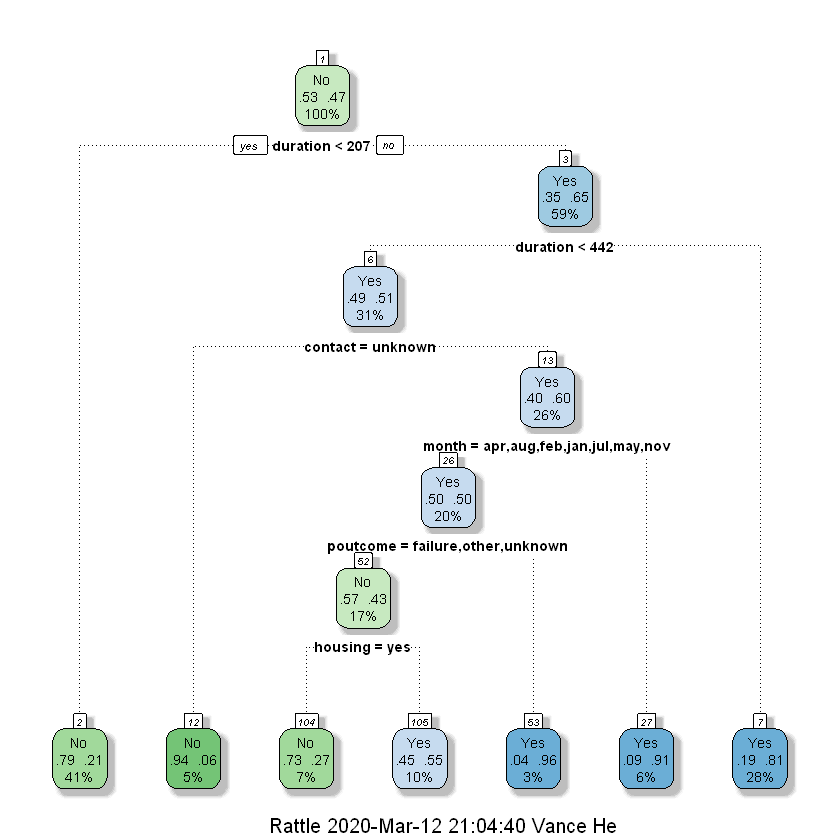

In [26]:
fancyRpartPlot(tree_sub)

**c)** Try (a) again using Random Forest. Use the “importance()”
function to determine which variables are most important. Describe
the effect of mtry, nodesize, and ntree on the error rate
obtained.

In [8]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [9]:
rf_c = randomForest(deposit ~., data = train, mtry = floor(sqrt(17)), importance = TRUE)
rf_c


Call:
 randomForest(formula = deposit ~ ., data = train, mtry = floor(sqrt(17)),      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 13.94%
Confusion matrix:
      No  Yes class.error
No  3407  721  0.17466085
Yes  368 3317  0.09986431

In [10]:
importance(rf_c)

,No,Yes,MeanDecreaseAccuracy,MeanDecreaseGini
age,32.481897,15.6031024,36.759136,264.16742
job,25.875700,5.0376527,21.976610,226.11986
marital,4.833804,13.2396276,13.896486,62.98191
education,12.365198,4.2389734,12.133578,79.05101
default,-2.683011,0.5889492,-1.187923,4.25192
balance,14.936768,11.7283109,19.205334,286.91387
housing,35.836638,29.5562968,45.782818,108.90493
loan,1.743471,13.8528414,11.787271,28.87057
contact,49.026740,18.8581786,53.773325,140.77010
day,50.066210,8.6883689,46.540680,256.06525


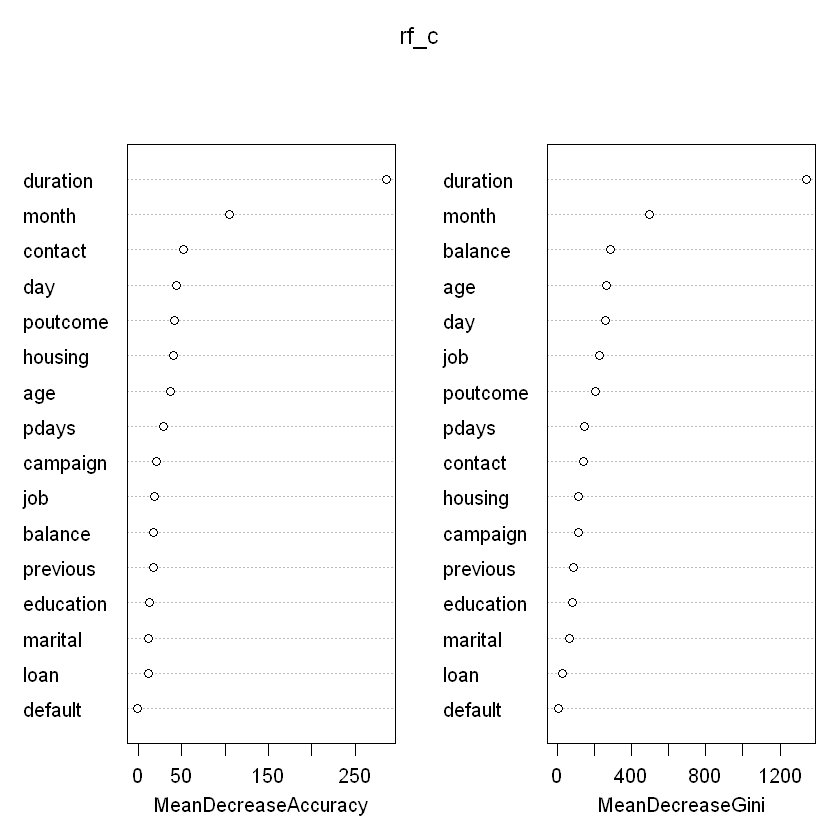

In [87]:
varImpPlot(rf_c)

In [82]:
# training error
rf_train_pred = predict(rf_c, newdata=train)
table(rf_train_pred, train$deposit)

             
rf_train_pred   No  Yes
          No  4128    0
          Yes    0 3685

In [88]:
rf_train_err = mean(rf_train_pred != train$deposit)
rf_train_err

[1] 0

In [89]:
# testing error
rf_test_pred = predict(rf_c, newdata=test)
table(rf_test_pred, test$deposit)

            
rf_test_pred   No  Yes
         No  1430  168
         Yes  315 1436

In [90]:
rf_test_err = mean(rf_test_pred != test$deposit)
rf_test_err

[1] 0.1442222

In [4]:
library(dplyr)
library(ggplot2)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.6.2"

In [25]:
mtry_val = c(2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16)
test_error = c()
for (i in 1:length(mtry_val)){
    rf_c = randomForest(deposit ~., data = train, mtry = mtry_val[i], importance = TRUE, ntree = 64, nodesize = 5)
    rf_test_pred = predict(rf_c, newdata=test)
    test_error[i] = mean(rf_test_pred != test$deposit)    
}

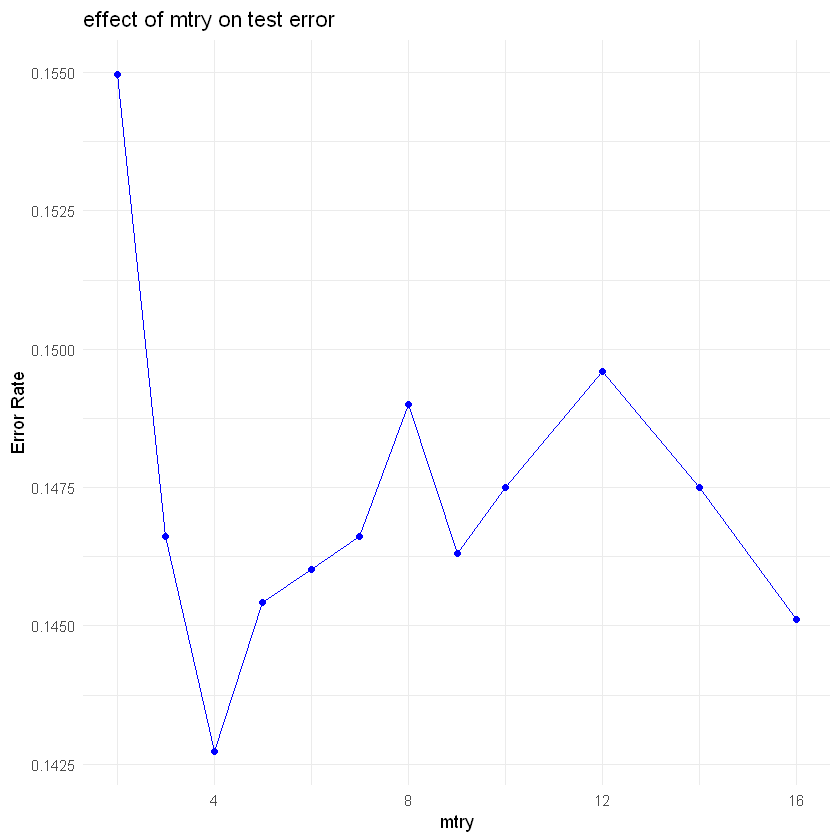

In [26]:
errors = data.frame(test_error, mtry_val)
ggplot(errors,color = Error, aes(x = mtry_val)) + 
  geom_line(aes(y = test_error), col = "blue") + geom_point(aes(y = test_error), col = "blue") +
  ylab("Error Rate") + xlab("mtry") + ggtitle("effect of mtry on test error") + 
  theme_minimal()

In [23]:
ntree_val = c(64, 72, 80, 88, 96, 104, 112, 120, 128)
test_error = c()
for (i in 1:length(ntree_val)){
    rf_c = randomForest(deposit ~., data = train, mtry = floor(sqrt(17)), importance = TRUE, ntree = ntree_val[i], nodesize = 5)
    rf_test_pred = predict(rf_c, newdata=test)
    test_error[i] = mean(rf_test_pred != test$deposit)    
}

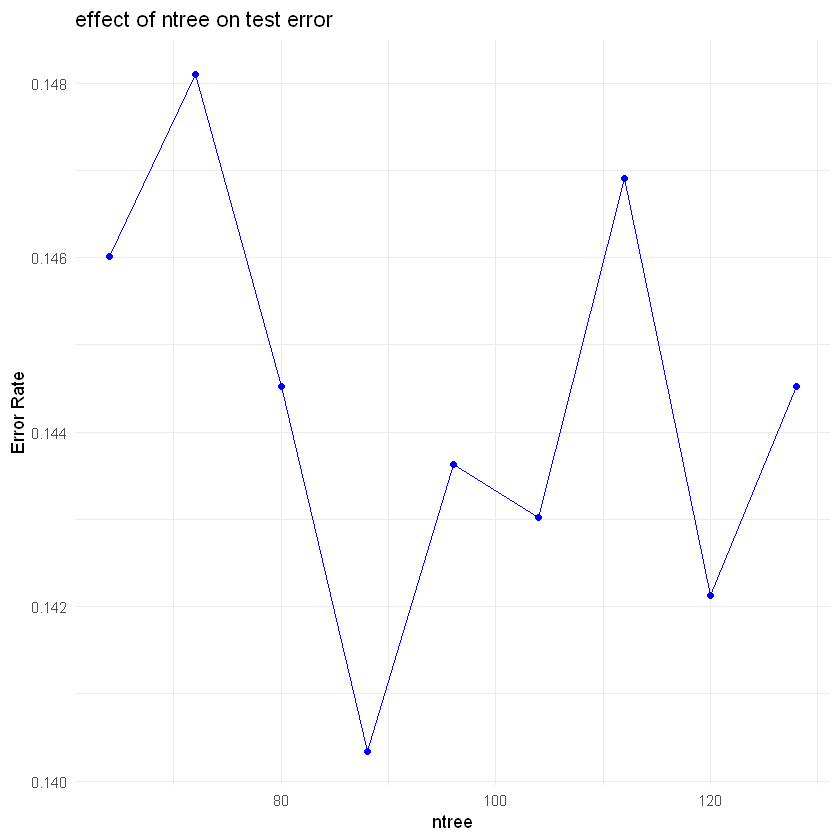

In [24]:
errors = data.frame(test_error, ntree_val)
ggplot(errors,color = Error, aes(x = ntree_val)) + 
  geom_line(aes(y = test_error), col = "blue") + geom_point(aes(y = test_error), col = "blue") +
  ylab("Error Rate") + xlab("ntree") + ggtitle("effect of ntree on test error") + 
  theme_minimal()

In [29]:
nodesize_val = c(2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 30, 40, 50)
test_error = c()
for (i in 1:length(nodesize_val)){
    rf_c = randomForest(deposit ~., data = train, mtry = floor(sqrt(17)), importance = TRUE, ntree = 88, nodesize = nodesize_val[i])
    rf_test_pred = predict(rf_c, newdata=test)
    test_error[i] = mean(rf_test_pred != test$deposit)    
}

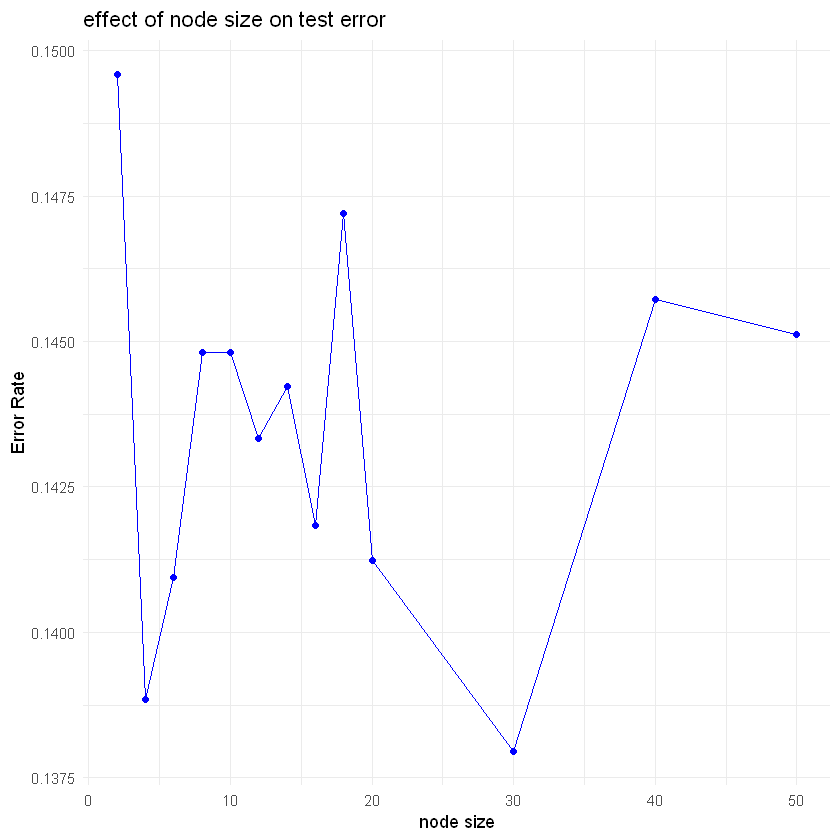

In [30]:
errors = data.frame(test_error, nodesize_val)
ggplot(errors,color = Error, aes(x = nodesize_val)) + 
  geom_line(aes(y = test_error), col = "blue") + geom_point(aes(y = test_error), col = "blue") +
  ylab("Error Rate") + xlab("node size") + ggtitle("effect of node size on test error") + 
  theme_minimal()

**d）**Try (a) again using Boosting. Use the “summary()” function
to determine which variables are most important. Describe the
effect of interaction.depth, shrinkage, and n.trees on the
error rate obtained.

In [6]:
library(gbm)

Warning message:
"package 'gbm' was built under R version 3.6.3"Loaded gbm 2.1.5


In [7]:
train$deposit = ifelse(train$deposit == "Yes", 1, 0)
test$deposit = ifelse(test$deposit == "Yes", 1, 0)

In [97]:
ada_mod = gbm(deposit ~., data=train, distribution="adaboost", n.trees=5000,
              interaction.depth=3, shrinkage = 0.01)

,var,rel.inf
duration,duration,26.86266542
month,month,22.52350606
job,job,11.42012639
balance,balance,10.09836012
age,age,5.75262312
day,day,5.70853442
poutcome,poutcome,4.59250217
pdays,pdays,3.20629747
contact,contact,3.01611751
campaign,campaign,1.55513761


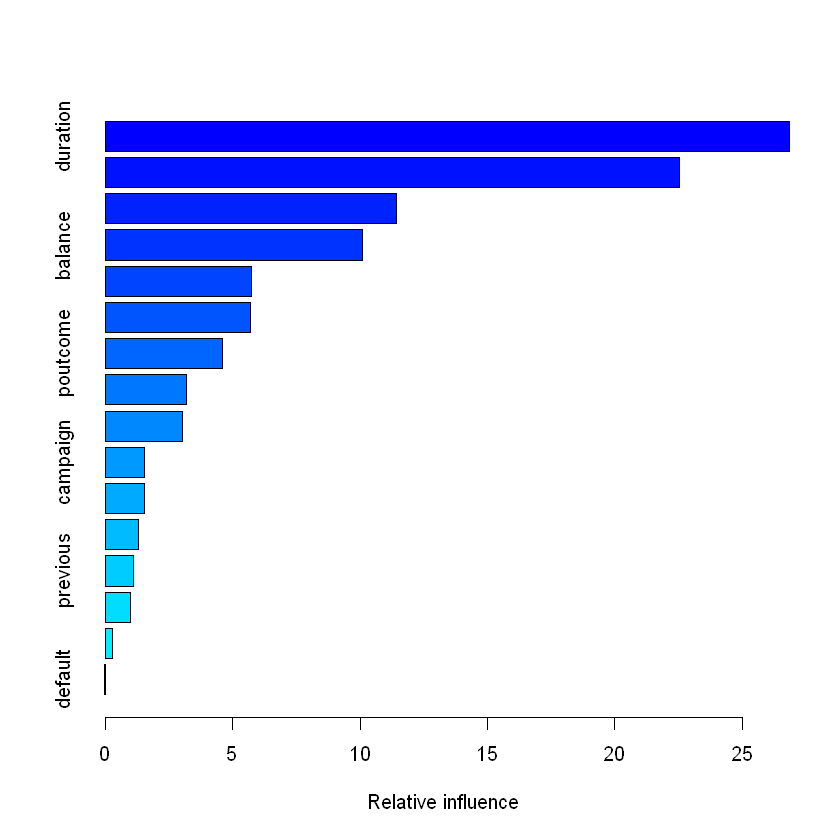

In [98]:
summary(ada_mod)

In [108]:
# training error
ada_train_res = predict(ada_mod, newdata=train, n.trees=5000, type="response")
ada_train_pred = ifelse(ada_train_res>0.5, 1, 0)
table(ada_train_pred, train$deposit)

              
ada_train_pred    0    1
             0 3970  127
             1  158 3558

In [109]:
ada_train_err = mean(ada_train_pred != train$deposit)
ada_train_err

[1] 0.03647767

In [110]:
# testing error
ada_test_res = predict(ada_mod, newdata=test, n.trees=5000, type="response")
ada_test_pred = ifelse(ada_test_res>0.5, 1, 0)
table(ada_test_pred, test$deposit)

             
ada_test_pred    0    1
            0 1479  229
            1  266 1375

In [111]:
ada_test_err = mean(ada_test_pred != test$deposit)
ada_test_err

[1] 0.1478053

**Using 1000 trees**

In [112]:
# testing error
ada_test_res = predict(ada_mod, newdata=test, n.trees=1000, type="response")
ada_test_pred = ifelse(ada_test_res>0.5, 1, 0)
table(ada_test_pred, test$deposit)

             
ada_test_pred    0    1
            0 1481  203
            1  264 1401

In [113]:
ada_test_err = mean(ada_test_pred != test$deposit)
ada_test_err

[1] 0.1394446

In [38]:
ntrees = c(100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 10000)
test_error = c()
for (i in 1:length(ntrees)){
    ada_mod = gbm(deposit ~., data=train, distribution="adaboost", n.trees=ntrees[i],
              interaction.depth=3, shrinkage = 0.01)
    ada_test_res = predict(ada_mod, newdata=test, n.trees=ntrees[i], type="response")
    ada_test_pred = ifelse(ada_test_res>0.5, 1, 0)
    test_error[i] = mean(ada_test_pred != test$deposit)   
}

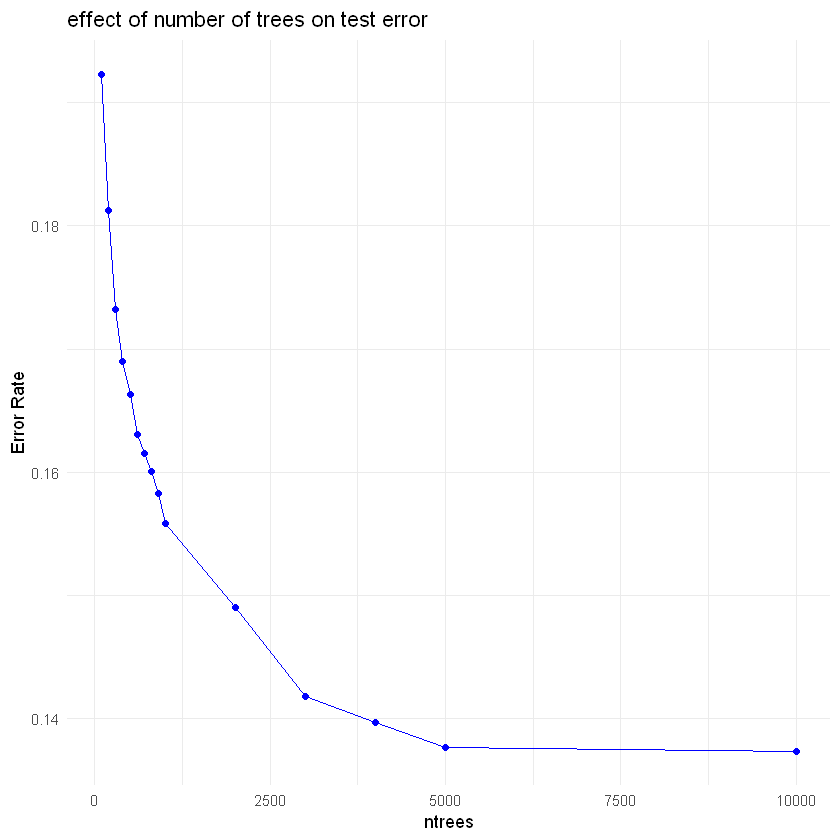

In [39]:
errors = data.frame(test_error, ntrees)
ggplot(errors,color = Error, aes(x = ntrees)) + 
  geom_line(aes(y = test_error), col = "blue") + geom_point(aes(y = test_error), col = "blue") +
  ylab("Error Rate") + xlab("ntrees") + ggtitle("effect of number of trees on test error") + 
  theme_minimal()

In [8]:
depth = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30)
test_error = c()
for (i in 1:length(depth)){
    ada_mod = gbm(deposit ~., data=train, distribution="adaboost", n.trees = 2000,
              interaction.depth=depth[i], shrinkage = 0.01)
    ada_test_res = predict(ada_mod, newdata=test, n.trees=2000, type="response")
    ada_test_pred = ifelse(ada_test_res>0.5, 1, 0)
    test_error[i] = mean(ada_test_pred != test$deposit)   
}

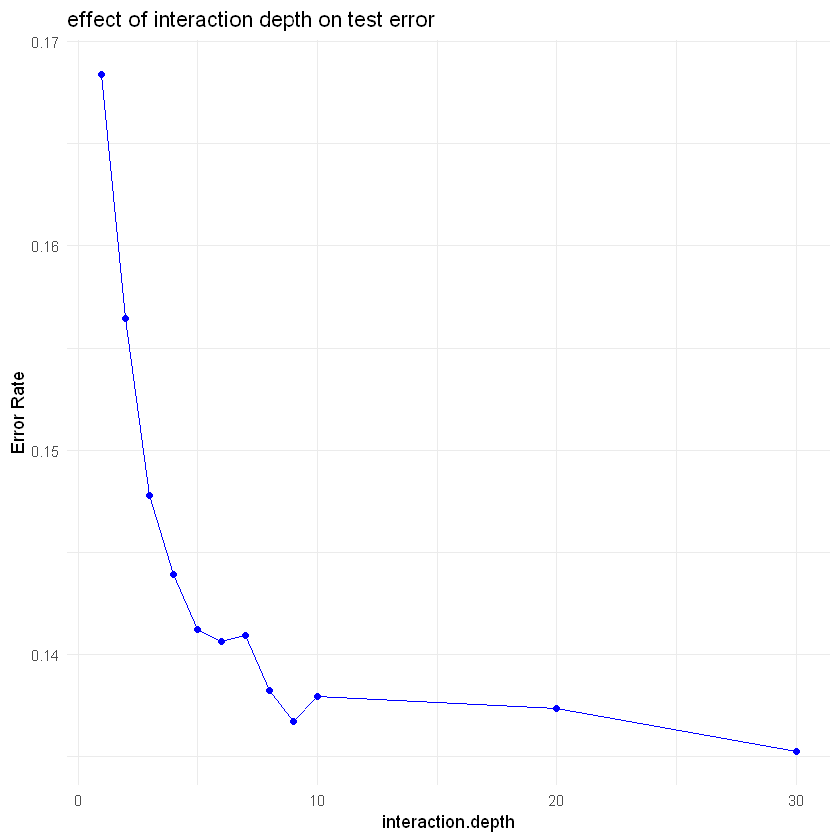

In [9]:
errors = data.frame(test_error,depth)
ggplot(errors,color = Error, aes(x = depth)) + 
  geom_line(aes(y = test_error), col = "blue") + geom_point(aes(y = test_error), col = "blue") +
  ylab("Error Rate") + xlab("interaction.depth") + ggtitle("effect of interaction depth on test error") + 
  theme_minimal()

In [10]:
shrinkage = c(0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5)
test_error = c()
for (i in 1:length(shrinkage)){
    ada_mod = gbm(deposit ~., data=train, distribution="adaboost", n.trees=2000,
              interaction.depth=3, shrinkage = shrinkage[i])
    ada_test_res = predict(ada_mod, newdata=test, n.trees=2000, type="response")
    ada_test_pred = ifelse(ada_test_res>0.5, 1, 0)
    test_error[i] = mean(ada_test_pred != test$deposit)   
}

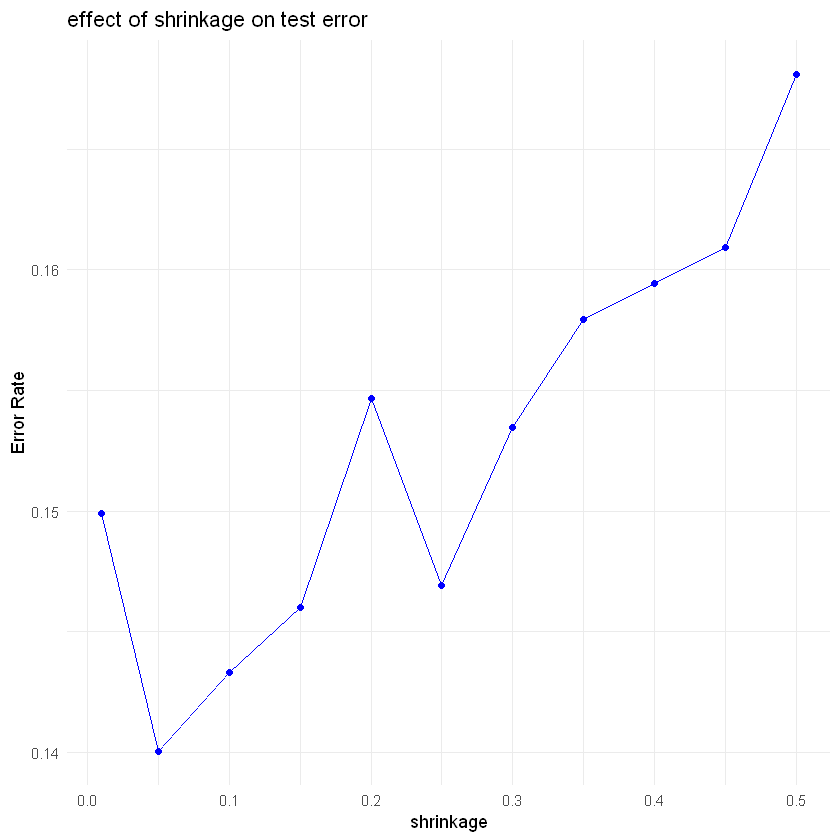

In [11]:
errors = data.frame(test_error,shrinkage)
ggplot(errors,color = Error, aes(x = shrinkage)) + 
  geom_line(aes(y = test_error), col = "blue") + geom_point(aes(y = test_error), col = "blue") +
  ylab("Error Rate") + xlab("shrinkage") + ggtitle("effect of shrinkage on test error") + 
  theme_minimal()